In [1]:
import pandas as pd
import numpy as np
from datetime import date, timedelta
import calendar
import matplotlib.pyplot as plt

##### Start with the most basic: beta. Explore the implications of the concentration of the seven in the S&P 500 (which is often used as the proxy for the market). How much of the beta is driven by the seven verses the 493 other stocks (i.e. they probably have different betas – think three)?

In [2]:
main_df = pd.read_csv("Data/bbg_data.csv", index_col=0)

main_df

,AAPL_price,AAPL_mcap,AAPL_return,AMZN_price,AMZN_mcap,AMZN_return,GOOGL_price,GOOGL_mcap,GOOGL_return,META_price,...,NVDA_return,TSLA_price,TSLA_mcap,TSLA_return,SPX_price,SPX_mcap,SPX_return,GOOG_price,GOOG_mcap,GOOG_return
2015-01-01,27.595,6.473610e+05,-1.9019,15.518,1.436940e+05,0.0161,26.533,3.584205e+05,-0.8631,78.02,...,-1.5709,14.8273,2.788617e+04,0.0810,2058.90,18845822.34,-1.03,26.248,3.584205e+05,-0.7579
2015-01-02,27.333,6.412029e+05,-0.9513,15.426,1.428467e+05,-0.5897,26.478,3.574916e+05,-0.2092,78.45,...,0.3990,14.6207,2.749748e+04,-1.3938,2058.20,18840128.85,-0.03,26.169,3.574916e+05,-0.3021
2015-01-05,26.563,6.231392e+05,-2.8172,15.110,1.399159e+05,-2.0517,25.973,3.503354e+05,-1.9054,77.19,...,-1.6890,14.0060,2.634146e+04,-4.2041,2020.58,18497686.83,-1.83,25.623,3.503354e+05,-2.0846
2015-01-06,26.565,6.231979e+05,0.0094,14.765,1.367212e+05,-2.2833,25.332,3.419722e+05,-2.4679,76.15,...,-3.0318,14.0853,2.649067e+04,0.5664,2002.61,18333610.15,-0.89,25.029,3.419722e+05,-2.3177
2015-01-07,26.938,6.319365e+05,1.4022,14.921,1.381704e+05,1.0600,25.258,3.411923e+05,-0.2941,76.15,...,-0.2866,14.0633,2.644929e+04,-0.1562,2025.90,18549992.79,1.16,24.986,3.411923e+05,-0.1713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-23,223.660,3.363371e+06,-0.0760,235.420,2.475444e+06,0.1745,197.980,2.433019e+06,-0.1966,636.45,...,0.1020,412.3800,1.323764e+06,-0.6577,6118.71,53943854.69,0.53,199.580,2.433019e+06,-0.2250
2025-01-24,222.780,3.350138e+06,-0.3935,234.850,2.469450e+06,-0.2421,200.210,2.460853e+06,1.1264,647.49,...,-3.1246,406.5800,1.305146e+06,-1.4065,6101.24,53800552.64,-0.29,201.900,2.460853e+06,1.1624
2025-01-27,229.860,3.456606e+06,3.1780,235.420,2.475444e+06,0.2427,191.810,2.359640e+06,-4.1956,659.88,...,-16.9682,397.1500,1.274875e+06,-2.3193,6012.28,53016057.50,-1.46,193.770,2.359640e+06,-4.0267
2025-01-28,238.260,3.582924e+06,3.6544,238.150,2.504150e+06,1.1596,195.300,2.401227e+06,1.8195,674.33,...,8.9259,398.0900,1.277893e+06,0.2367,6067.70,53490109.97,0.92,197.070,2.401227e+06,1.7031


In [3]:
tickers = ["AAPL", "AMZN", "GOOGL", "GOOG", "META", "MSFT", "NVDA", "TSLA", "SPX"]
return_tickers = [f"{ticker}_return" for ticker in tickers]
return_df = main_df[return_tickers].copy()
return_df.reset_index(drop=True, inplace=True)

return_df

,AAPL_return,AMZN_return,GOOGL_return,GOOG_return,META_return,MSFT_return,NVDA_return,TSLA_return,SPX_return
0,-1.9019,0.0161,-0.8631,-0.7579,-1.5148,-1.2123,-1.5709,0.0810,-1.03
1,-0.9513,-0.5897,-0.2092,-0.3021,0.5511,0.6674,0.3990,-1.3938,-0.03
2,-2.8172,-2.0517,-1.9054,-2.0846,-1.6061,-0.9303,-1.6890,-4.2041,-1.83
3,0.0094,-2.2833,-2.4679,-2.3177,-1.3473,-1.4571,-3.0318,0.5664,-0.89
4,1.4022,1.0600,-0.2941,-0.1713,0.0000,1.2705,-0.2866,-0.1562,1.16
...,...,...,...,...,...,...,...,...,...
2625,-0.0760,0.1745,-0.1966,-0.2250,2.0770,0.1143,0.1020,-0.6577,0.53
2626,-0.3935,-0.2421,1.1264,1.1624,1.7346,-0.5932,-3.1246,-1.4065,-0.29
2627,3.1780,0.2427,-4.1956,-4.0267,1.9135,-2.1394,-16.9682,-2.3193,-1.46
2628,3.6544,1.1596,1.8195,1.7031,2.1898,2.9087,8.9259,0.2367,0.92


In [4]:
# Calculating rolling window beta for Mag7 from 2015-2025
ms_betas = {ticker: [] for ticker in tickers}

# Parameters
window_size = 252   # 1-year rolling window (approx)

for row in return_df.itertuples():
    if row.Index < window_size:
        for ticker in tickers:
            ms_betas[ticker].append(np.nan)
        continue

    beta_df = return_df[row.Index - window_size:row.Index + 1]
    cov_vector = beta_df.cov()["SPX_return"]
    cov_vector /= cov_vector["SPX_return"]

    for ticker, beta in cov_vector.items():
        ms_betas[ticker[:-7]].append(beta)


for ticker, beta_ts in ms_betas.items():
    main_df[f"{ticker}_beta"] = beta_ts

main_df
    

,AAPL_price,AAPL_mcap,AAPL_return,AMZN_price,AMZN_mcap,AMZN_return,GOOGL_price,GOOGL_mcap,GOOGL_return,META_price,...,GOOG_return,AAPL_beta,AMZN_beta,GOOGL_beta,GOOG_beta,META_beta,MSFT_beta,NVDA_beta,TSLA_beta,SPX_beta
2015-01-01,27.595,6.473610e+05,-1.9019,15.518,1.436940e+05,0.0161,26.533,3.584205e+05,-0.8631,78.02,...,-0.7579,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-02,27.333,6.412029e+05,-0.9513,15.426,1.428467e+05,-0.5897,26.478,3.574916e+05,-0.2092,78.45,...,-0.3021,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-05,26.563,6.231392e+05,-2.8172,15.110,1.399159e+05,-2.0517,25.973,3.503354e+05,-1.9054,77.19,...,-2.0846,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-06,26.565,6.231979e+05,0.0094,14.765,1.367212e+05,-2.2833,25.332,3.419722e+05,-2.4679,76.15,...,-2.3177,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2015-01-07,26.938,6.319365e+05,1.4022,14.921,1.381704e+05,1.0600,25.258,3.411923e+05,-0.2941,76.15,...,-0.1713,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-23,223.660,3.363371e+06,-0.0760,235.420,2.475444e+06,0.1745,197.980,2.433019e+06,-0.1966,636.45,...,-0.2250,0.915099,1.504005,1.175511,1.176837,1.386592,1.168182,2.696162,2.603316,1.0
2025-01-24,222.780,3.350138e+06,-0.3935,234.850,2.469450e+06,-0.2421,200.210,2.460853e+06,1.1264,647.49,...,1.1624,0.914841,1.504388,1.172046,1.173255,1.382531,1.168827,2.703979,2.604201,1.0
2025-01-27,229.860,3.456606e+06,3.1780,235.420,2.475444e+06,0.2427,191.810,2.359640e+06,-4.1956,659.88,...,-4.0267,0.875086,1.483369,1.195727,1.195895,1.336016,1.166864,2.826309,2.596389,1.0
2025-01-28,238.260,3.582924e+06,3.6544,238.150,2.504150e+06,1.1596,195.300,2.401227e+06,1.8195,674.33,...,1.7031,0.889200,1.482114,1.199288,1.198885,1.340733,1.176434,2.857540,2.584734,1.0


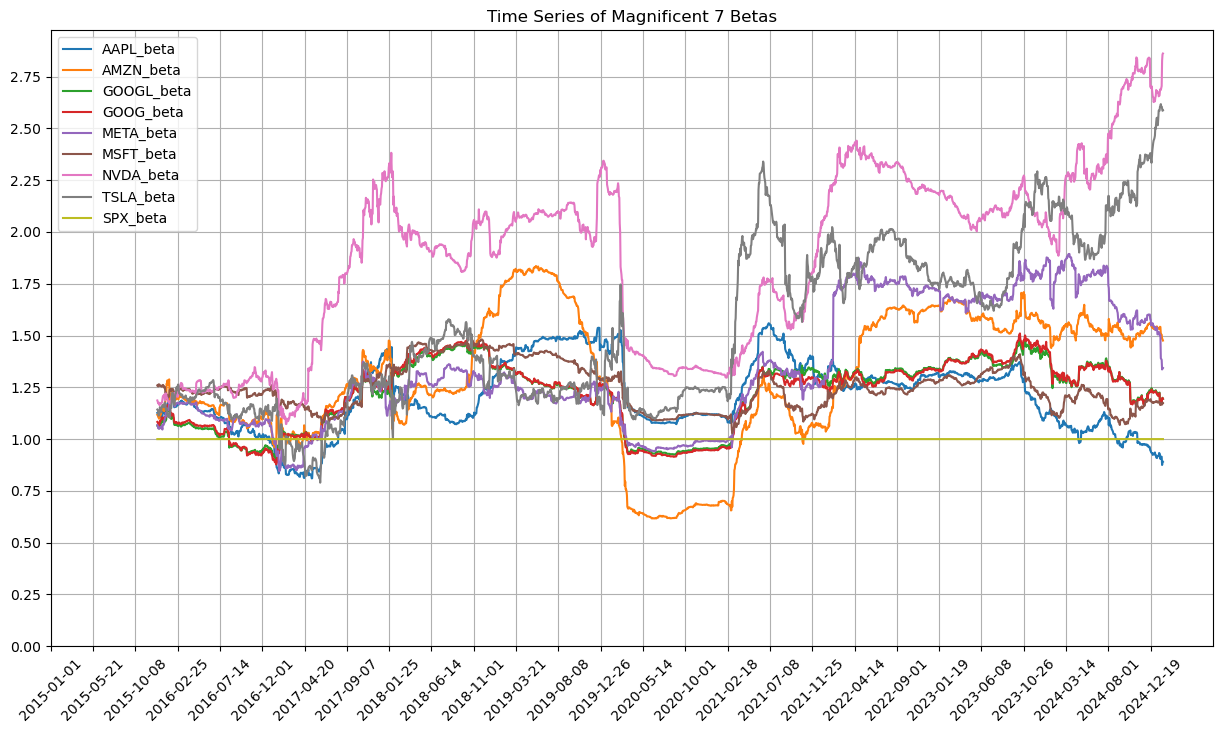

In [5]:
# Plotting beta time-series of Mag7 securities
beta_df = main_df[[f"{ticker}_beta" for ticker in tickers]]

plt.figure(figsize=(15, 8))

for column in beta_df.columns:
    plt.plot(beta_df.index, beta_df[column], label=column)

plt.title("Time Series of Magnificent 7 Betas")
plt.xticks(beta_df.index[::100], rotation=45)
plt.yticks([i/4 for i in range(12)])
plt.grid()
plt.legend();

##### ACTUAL SPX WEIGHTING METHODOLOGY (from their methodology document)
Weighting. Each index is capped market capitalization weighted. For capping purposes, the indices
rebalance quarterly after the close of business on the third Friday of March, June, September, and
December using the following procedures:
1. The rebalancing reference date is the Wednesday prior to the second Friday of March, June,
September, and December.
2. With prices reflected on the rebalancing reference date, adjusted for any applicable corporate
actions, and membership, shares outstanding and IWFs as of the rebalancing effective date,
each company is FMC weighted.
3. If any company has an FMC weight greater than 24%, the cap all companies’ weight at 23%,
which allows for a 2% buffer.
2 GICS sub-industry indices calculate for the Energy Select Sector Index. Constituents’ weight adjustment factors flow through from
the underlying index.
3 S&P Dow Jones Indices created back calculated history for the Communication Services Select Sector Index based on the
securities in the headline S&P 500 that would have hypothetically been classified as GICS Code 50 under this new structure
effective September 24, 2018.
S&P Dow Jones Indices: S&P U.S. Indices Methodology 15
4. The sum of the companies with weights greater than 4.8% cannot exceed 50% of the total index
weight. These caps are set to allow for a buffer below the 5% limit.
5. If the rule in Step 4 is breached, set the weight of companies greater than 4.8% equal to:
𝑊 𝑖
𝐶𝑎𝑝𝑝𝑒𝑑 = max (45% × 𝑊 𝑖
∑ 𝑁
𝑖 𝑊 𝑖
, 4.5%)
where:
N = total number of companies with index weights over 4.8%, after checking the single
company cap
Wi = index weight of the N companies with individual company weights over 4.8%, after
checking the single company cap
Set 4.5% and 45% caps to allow for a buffer below the 5% limit
6. Proportionally redistribute the excess weight from Steps 3 to 5 to companies with an initial weight
less than 4.8%, setting a 4.5% upper bound on the companies’ index weight.
7. Assign index share amounts to each constituent to arrive at the weights calculated above. Since
index shares are assigned based on prices one week prior to rebalancing, the actual weight of
each constituent at the rebalancing differs somewhat from these weights due to market
movements.

In [6]:
# Just loosely checking to see if any of the main conditions are breached
for ticker in tickers:
    main_df[f"{ticker}_weight"] = main_df[f"{ticker}_mcap"] / main_df["SPX_mcap"]

main_df["MSFT_weight"].describe()

count    2630.000000
mean        0.043294
std         0.016610
min         0.017458
25%         0.025324
50%         0.044041
75%         0.057114
max         0.071570
Name: MSFT_weight, dtype: float64

##### Don't think any cap will get breached, so will just do loose weight calculations: Update on 3rd Friday of March, June, September, December using weights from Wednesday the week of the previous Friday

In [7]:
# Get Key Dates
update_dates = set()
ref_dates = set()

for year in range(2015, 2026):
    for month in [3, 6, 9, 12]:
        first_day = date(year, month, 1)
        first_fri = first_day + timedelta(days=(calendar.FRIDAY - first_day.weekday() + 7) % 7)
        third_fri = first_fri + timedelta(weeks=2)
        second_wed = third_fri - timedelta(weeks=1, days=2)
        update_dates.add(third_fri.strftime("%Y-%m-%d")) 
        ref_dates.add(second_wed.strftime("%Y-%m-%d")) 

ref_dates

{'2015-03-11',
 '2015-06-10',
 '2015-09-09',
 '2015-12-09',
 '2016-03-09',
 '2016-06-08',
 '2016-09-07',
 '2016-12-07',
 '2017-03-08',
 '2017-06-07',
 '2017-09-06',
 '2017-12-06',
 '2018-03-07',
 '2018-06-06',
 '2018-09-12',
 '2018-12-12',
 '2019-03-06',
 '2019-06-12',
 '2019-09-11',
 '2019-12-11',
 '2020-03-11',
 '2020-06-10',
 '2020-09-09',
 '2020-12-09',
 '2021-03-10',
 '2021-06-09',
 '2021-09-08',
 '2021-12-08',
 '2022-03-09',
 '2022-06-08',
 '2022-09-07',
 '2022-12-07',
 '2023-03-08',
 '2023-06-07',
 '2023-09-06',
 '2023-12-06',
 '2024-03-06',
 '2024-06-12',
 '2024-09-11',
 '2024-12-11',
 '2025-03-12',
 '2025-06-11',
 '2025-09-10',
 '2025-12-10'}

In [8]:
# Calculating risk contributions for Mag7 from 2015-2025
ms_risks = {ticker: [] for ticker in tickers}

existing_weights = {ticker: main_df.iloc[0][f"{ticker}_weight"] for ticker in tickers}
temp_weights = {ticker: 0 for ticker in tickers}
for row in main_df.itertuples():
    if row.Index in ref_dates:
        for ticker in tickers:
            temp_weights[ticker] = getattr(row, f"{ticker}_weight")

    if row.Index in update_dates:
        existing_weights = temp_weights

    for ticker in tickers:
        ms_risks[ticker].append(existing_weights[ticker] * getattr(row, f"{ticker}_beta"))


for ticker, risk_ts in ms_risks.items():
    main_df[f"{ticker}_risk"] = risk_ts

mag_s = ["AAPL", "AMZN", "GOOGL", "GOOG", "META", "MSFT", "NVDA", "TSLA"]
main_df["M7_risk"] = main_df[[f"{ticker}_risk" for ticker in mag_s]].sum(axis=1)
main_df["OTHER_risk"] = 1 - main_df["M7_risk"]

main_df

,AAPL_price,AAPL_mcap,AAPL_return,AMZN_price,AMZN_mcap,AMZN_return,GOOGL_price,GOOGL_mcap,GOOGL_return,META_price,...,AMZN_risk,GOOGL_risk,GOOG_risk,META_risk,MSFT_risk,NVDA_risk,TSLA_risk,SPX_risk,M7_risk,OTHER_risk
2015-01-01,27.595,6.473610e+05,-1.9019,15.518,1.436940e+05,0.0161,26.533,3.584205e+05,-0.8631,78.02,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
2015-01-02,27.333,6.412029e+05,-0.9513,15.426,1.428467e+05,-0.5897,26.478,3.574916e+05,-0.2092,78.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
2015-01-05,26.563,6.231392e+05,-2.8172,15.110,1.399159e+05,-2.0517,25.973,3.503354e+05,-1.9054,77.19,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
2015-01-06,26.565,6.231979e+05,0.0094,14.765,1.367212e+05,-2.2833,25.332,3.419722e+05,-2.4679,76.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
2015-01-07,26.938,6.319365e+05,1.4022,14.921,1.381704e+05,1.0600,25.258,3.411923e+05,-0.2941,76.15,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-23,223.660,3.363371e+06,-0.0760,235.420,2.475444e+06,0.1745,197.980,2.433019e+06,-0.1966,636.45,...,0.068022,0.052693,0.052753,0.041384,0.072844,0.171825,0.066308,1.0,0.589518,0.410482
2025-01-24,222.780,3.350138e+06,-0.3935,234.850,2.469450e+06,-0.2421,200.210,2.460853e+06,1.1264,647.49,...,0.068039,0.052538,0.052592,0.041263,0.072884,0.172323,0.066330,1.0,0.589641,0.410359
2025-01-27,229.860,3.456606e+06,3.1780,235.420,2.475444e+06,0.2427,191.810,2.359640e+06,-4.1956,659.88,...,0.067088,0.053599,0.053607,0.039874,0.072761,0.180120,0.066131,1.0,0.594086,0.405914
2025-01-28,238.260,3.582924e+06,3.6544,238.150,2.504150e+06,1.1596,195.300,2.401227e+06,1.8195,674.33,...,0.067032,0.053759,0.053741,0.040015,0.073358,0.182110,0.065834,1.0,0.597737,0.402263


In [9]:
plotting_tickers = ["AAPL", "AMZN", "GOOGL", "GOOG", "META", "MSFT", "NVDA", "TSLA", "M7", "OTHER"]
plotting_df = main_df[[f"{ticker}_risk" for ticker in plotting_tickers]].dropna()
plotting_df.columns = plotting_tickers

plotting_df

,AAPL,AMZN,GOOGL,GOOG,META,MSFT,NVDA,TSLA,M7,OTHER
2015-12-21,0.038944,0.018675,0.029730,0.030227,0.016935,0.029651,0.001120,0.001802,0.167084,0.832916
2015-12-22,0.038697,0.018641,0.029712,0.030167,0.016876,0.029631,0.001114,0.001797,0.166635,0.833365
2015-12-23,0.038674,0.018500,0.029525,0.029958,0.016692,0.029539,0.001107,0.001784,0.165779,0.834221
2015-12-24,0.038476,0.018458,0.029505,0.029904,0.016711,0.029778,0.001109,0.001756,0.165697,0.834303
2015-12-25,0.038617,0.018358,0.029332,0.029747,0.016674,0.029745,0.001101,0.001764,0.165338,0.834662
...,...,...,...,...,...,...,...,...,...,...
2025-01-23,0.063690,0.068022,0.052693,0.052753,0.041384,0.072844,0.171825,0.066308,0.589518,0.410482
2025-01-24,0.063672,0.068039,0.052538,0.052592,0.041263,0.072884,0.172323,0.066330,0.589641,0.410359
2025-01-27,0.060905,0.067088,0.053599,0.053607,0.039874,0.072761,0.180120,0.066131,0.594086,0.405914
2025-01-28,0.061887,0.067032,0.053759,0.053741,0.040015,0.073358,0.182110,0.065834,0.597737,0.402263


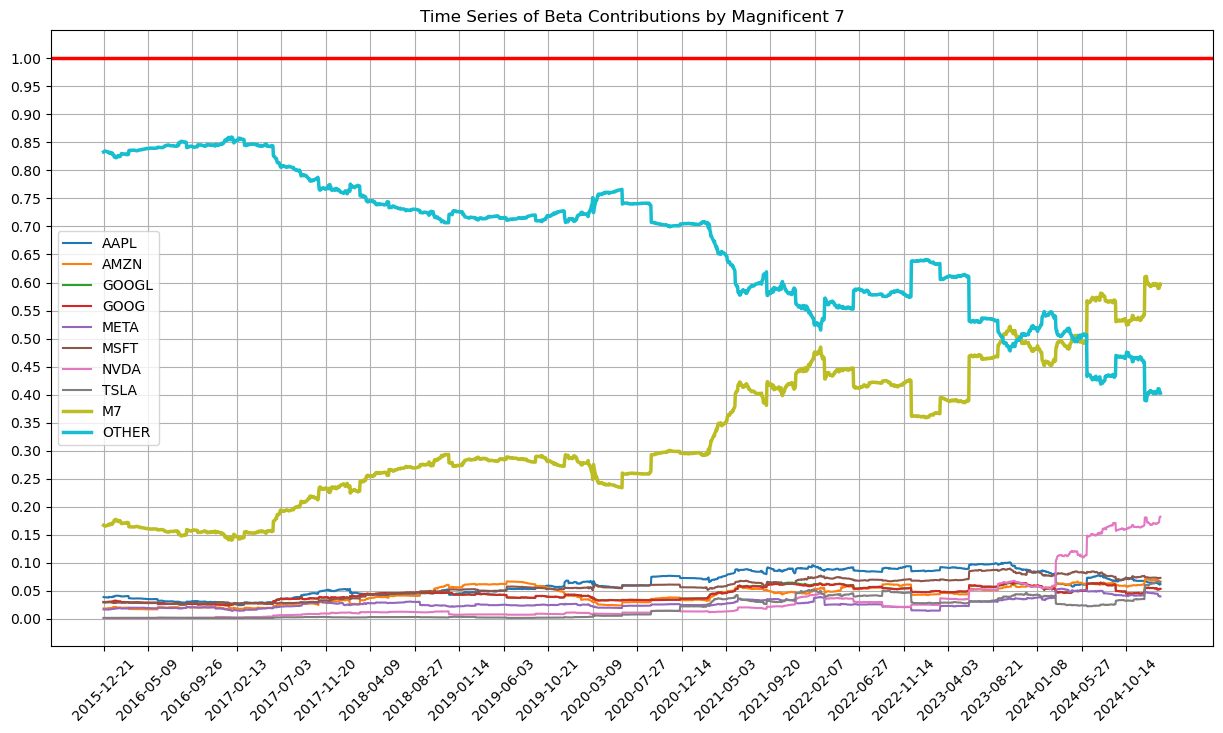

In [41]:
plt.figure(figsize=(15, 8))

for column in plotting_df.columns:
    if column in ["M7", "OTHER"]:
        plt.plot(plotting_df.index, plotting_df[column], label=column, linewidth=2.5)
    else:
        plt.plot(plotting_df.index, plotting_df[column], label=column)
plt.axhline(y=1, color='r', linewidth=2.5)

plt.title("Time Series of Beta Contributions by Magnificent 7")
plt.xticks(plotting_df.index[::100], rotation=45)
plt.yticks([i/20 for i in range(21)])
plt.grid()
plt.legend();

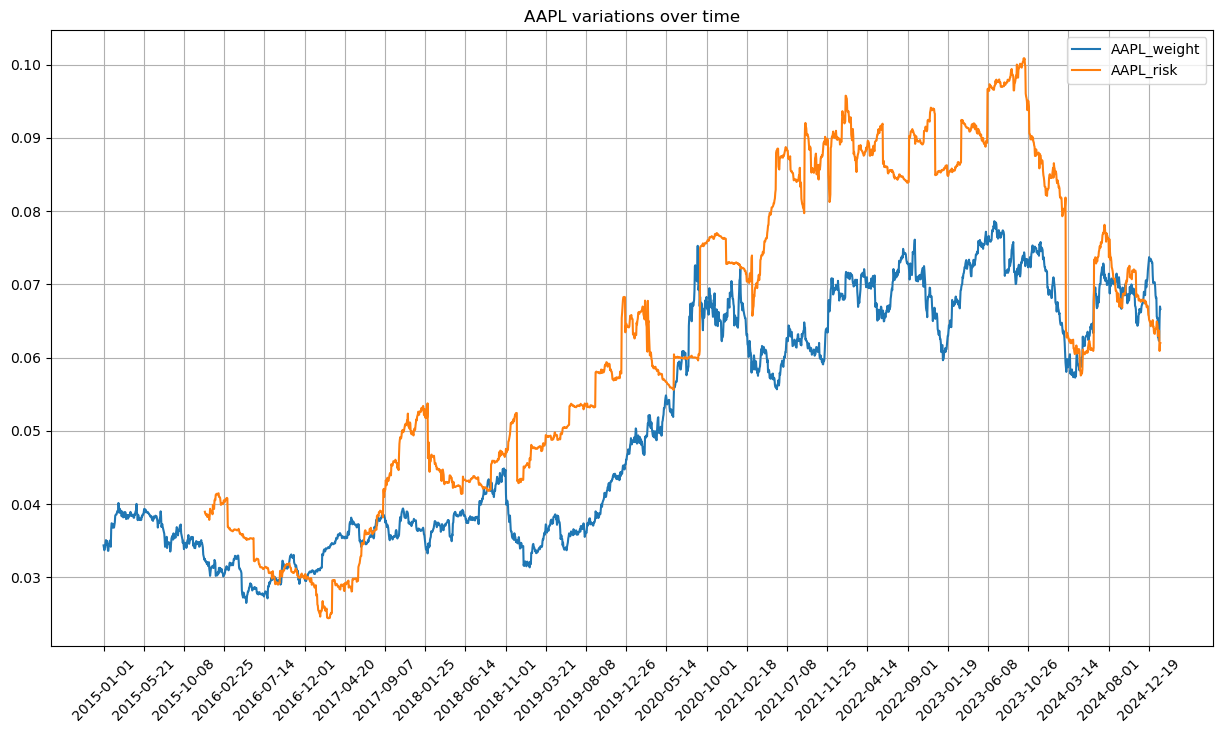

In [11]:
# Analyze how much risk contribution for each individual security are driven by weight changes against beta changes
ticker_of_interest = "AAPL"

plt.figure(figsize=(15, 8))
#plt.plot(main_df.index, main_df[f"{ticker_of_interest}_beta"], label=f"{ticker_of_interest}_beta")
plt.plot(main_df.index, main_df[f"{ticker_of_interest}_weight"], label=f"{ticker_of_interest}_weight")
plt.plot(main_df.index, main_df[f"{ticker_of_interest}_risk"], label=f"{ticker_of_interest}_risk")
plt.xticks(main_df.index[::100], rotation=45)
plt.title(f"{ticker_of_interest} variations over time")
plt.grid()
plt.legend();

##### Notes:
- There seems to be quite some temporal variation in betas for all Mag7 stocks => changes in beta contributions in Mag7 over time may not just be due to an increase in concentration, but also due to these large changes in beta
- How are beta's usually configured in making forward expectations in security returns? There seems to be a lot of variability to begin with which could imply it's been pretty weak to begin with? idk mannnn
- Are we able to somehow isolate the changes in risk contributions because of weight changes? Maybe as an aggregate the large beta changes don't really matter even since it's scaled so heavily by the market cap weight
- Some M7 stock risk contributions seem to stick to weights pretty decently (AAPL), while some seem to be more heavily driven by beta?
- Due to the reweighting process, you see sharp changes in risk contributions. Does this mean anything for forecasting?

In [12]:
# DON'T THINK THIS SAYS MUCH LOL
# Check correlation structure of eac M7 security of weight and risk against beta
for ticker in mag_s:
    corr_structure = main_df[[f"{ticker}_weight", f"{ticker}_beta", f"{ticker}_risk"]].corr()
    risk_weight = corr_structure[f"{ticker}_weight"][f"{ticker}_risk"]
    risk_beta = corr_structure[f"{ticker}_beta"][f"{ticker}_risk"]

    print(f"{ticker} Correlations")
    print("Weight against risk:", risk_weight)
    print("Beta against risk:", risk_beta)
    print()

AAPL Correlations
Weight against risk: 0.9139654778211213
Beta against risk: 0.448604708849846

AMZN Correlations
Weight against risk: 0.5178118219001474
Beta against risk: 0.7032759817810441

GOOGL Correlations
Weight against risk: 0.8504525964200182
Beta against risk: 0.7764207909518872

GOOG Correlations
Weight against risk: 0.8379768657764498
Beta against risk: 0.760596849264586

META Correlations
Weight against risk: 0.636973436717807
Beta against risk: 0.5659509287886823

MSFT Correlations
Weight against risk: 0.960160122338982
Beta against risk: -0.018655640357361444

NVDA Correlations
Weight against risk: 0.9769837294968438
Beta against risk: 0.6468961826404123

TSLA Correlations
Weight against risk: 0.9307885273427907
Beta against risk: 0.8688534477584472



In [13]:
# Add on weights assigned by rebalance mechanism
ms_adj_weight = {ticker: [] for ticker in mag_s}

existing_weights = {ticker: main_df.iloc[0][f"{ticker}_weight"] for ticker in tickers}
temp_weights = {ticker: 0 for ticker in tickers}
for row in main_df.itertuples():
    if row.Index in ref_dates:
        for ticker in tickers:
            temp_weights[ticker] = getattr(row, f"{ticker}_weight")

    if row.Index in update_dates:
        existing_weights = temp_weights

    for ticker in mag_s:
        ms_adj_weight[ticker].append(existing_weights[ticker])


for ticker, adj_weight_ts in ms_adj_weight.items():
    main_df[f"{ticker}_index_weight"] = adj_weight_ts

main_df["M7_index_weight"] = main_df[[f"{ticker}_index_weight" for ticker in mag_s]].sum(axis=1)

main_df

,AAPL_price,AAPL_mcap,AAPL_return,AMZN_price,AMZN_mcap,AMZN_return,GOOGL_price,GOOGL_mcap,GOOGL_return,META_price,...,OTHER_risk,AAPL_index_weight,AMZN_index_weight,GOOGL_index_weight,GOOG_index_weight,META_index_weight,MSFT_index_weight,NVDA_index_weight,TSLA_index_weight,M7_index_weight
2015-01-01,27.595,6.473610e+05,-1.9019,15.518,1.436940e+05,0.0161,26.533,3.584205e+05,-0.8631,78.02,...,1.000000,0.034350,0.007625,0.019019,0.019019,0.011541,0.020316,0.000578,0.00148,0.113928
2015-01-02,27.333,6.412029e+05,-0.9513,15.426,1.428467e+05,-0.5897,26.478,3.574916e+05,-0.2092,78.45,...,1.000000,0.034350,0.007625,0.019019,0.019019,0.011541,0.020316,0.000578,0.00148,0.113928
2015-01-05,26.563,6.231392e+05,-2.8172,15.110,1.399159e+05,-2.0517,25.973,3.503354e+05,-1.9054,77.19,...,1.000000,0.034350,0.007625,0.019019,0.019019,0.011541,0.020316,0.000578,0.00148,0.113928
2015-01-06,26.565,6.231979e+05,0.0094,14.765,1.367212e+05,-2.2833,25.332,3.419722e+05,-2.4679,76.15,...,1.000000,0.034350,0.007625,0.019019,0.019019,0.011541,0.020316,0.000578,0.00148,0.113928
2015-01-07,26.938,6.319365e+05,1.4022,14.921,1.381704e+05,1.0600,25.258,3.411923e+05,-0.2941,76.15,...,1.000000,0.034350,0.007625,0.019019,0.019019,0.011541,0.020316,0.000578,0.00148,0.113928
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-01-23,223.660,3.363371e+06,-0.0760,235.420,2.475444e+06,0.1745,197.980,2.433019e+06,-0.1966,636.45,...,0.410482,0.069599,0.045227,0.044826,0.044826,0.029846,0.062356,0.063730,0.02547,0.385880
2025-01-24,222.780,3.350138e+06,-0.3935,234.850,2.469450e+06,-0.2421,200.210,2.460853e+06,1.1264,647.49,...,0.410359,0.069599,0.045227,0.044826,0.044826,0.029846,0.062356,0.063730,0.02547,0.385880
2025-01-27,229.860,3.456606e+06,3.1780,235.420,2.475444e+06,0.2427,191.810,2.359640e+06,-4.1956,659.88,...,0.405914,0.069599,0.045227,0.044826,0.044826,0.029846,0.062356,0.063730,0.02547,0.385880
2025-01-28,238.260,3.582924e+06,3.6544,238.150,2.504150e+06,1.1596,195.300,2.401227e+06,1.8195,674.33,...,0.402263,0.069599,0.045227,0.044826,0.044826,0.029846,0.062356,0.063730,0.02547,0.385880


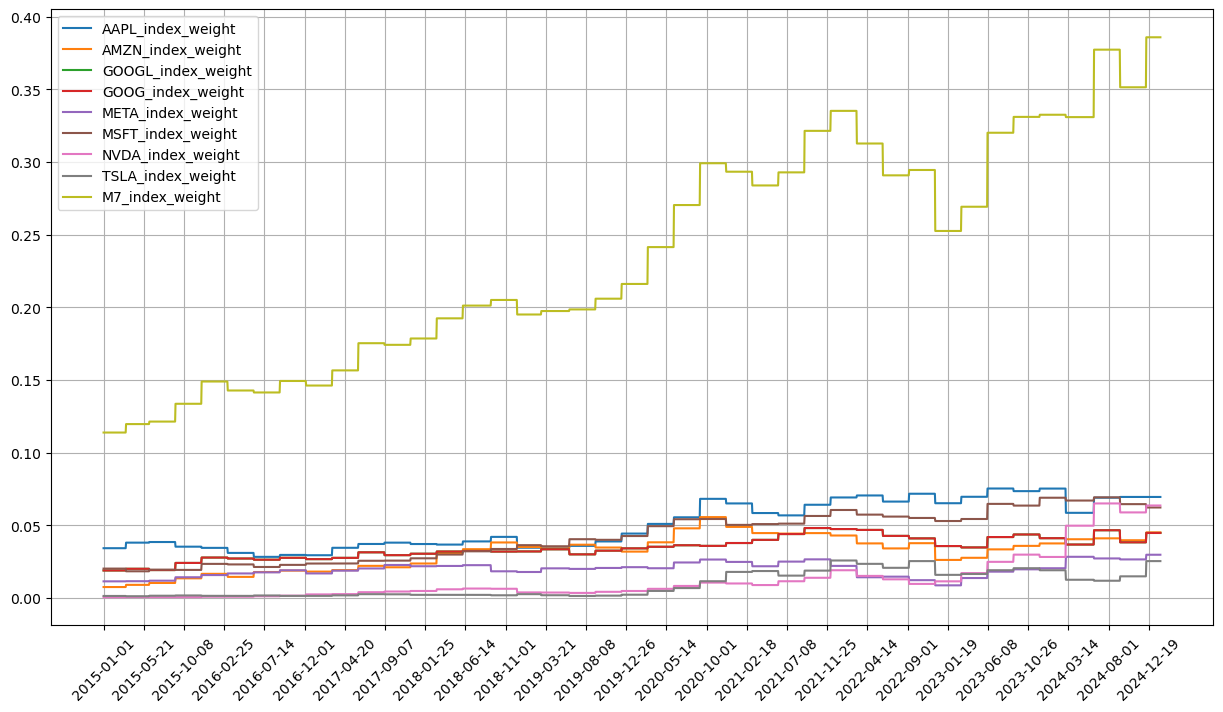

In [14]:
# Check starting point of when the weight starts varying quite strongly
plt.figure(figsize=(15, 8))

index_weight_columns = [f"{ticker}_index_weight" for ticker in mag_s] + ["M7_index_weight"]
for column in index_weight_columns:
    plt.plot(main_df.index, main_df[column], label=column)

plt.grid()
plt.xticks(main_df.index[::100], rotation=45)
plt.legend();

In [25]:
main_df["M7_risk"]

2015-01-01    0.000000
2015-01-02    0.000000
2015-01-05    0.000000
2015-01-06    0.000000
2015-01-07    0.000000
                ...   
2025-01-23    0.589518
2025-01-24    0.589641
2025-01-27    0.594086
2025-01-28    0.597737
2025-01-29    0.597367
Name: M7_risk, Length: 2630, dtype: float64

In [40]:
# Try holding betas constant from a date onwards, to see how much weight changes have contributed to increased risk contributions
cutoff_date = "2019-01-01"

fixed_beta = main_df.loc["2019-01-01"][[f"{ticker}_beta" for ticker in mag_s]]
adj_ms_risk = []
for row in main_df.itertuples():
    if row.Index <= cutoff_date:
        adj_ms_risk.append(row.M7_risk)

    else:
        current_risk = 0
        for ticker in mag_s:
            current_risk += getattr(row, f"{ticker}_index_weight") * fixed_beta[f"{ticker}_beta"]
        adj_ms_risk.append(current_risk)

main_df["adj_M7_risk"] = adj_ms_risk

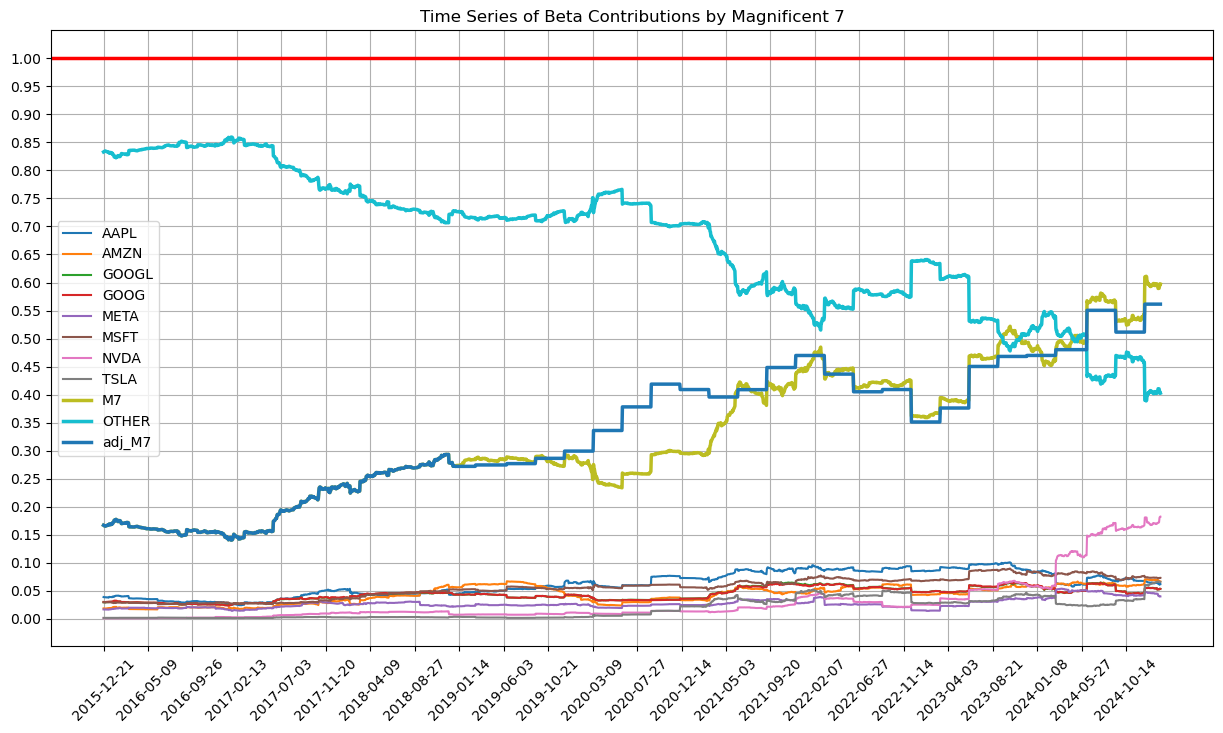

In [43]:
# Creating time-series of risk contributions while holding the betas constant from cutoff-date
plotting_tickers = ["AAPL", "AMZN", "GOOGL", "GOOG", "META", "MSFT", "NVDA", "TSLA", "M7", "OTHER", "adj_M7"]
plotting_df = main_df[[f"{ticker}_risk" for ticker in plotting_tickers]].dropna()
plotting_df.columns = plotting_tickers

plt.figure(figsize=(15, 8))

for column in plotting_df.columns:
    if column in ["M7", "OTHER", "adj_M7"]:
        plt.plot(plotting_df.index, plotting_df[column], label=column, linewidth=2.5)
    else:
        plt.plot(plotting_df.index, plotting_df[column], label=column)
plt.axhline(y=1, color='r', linewidth=2.5)

plt.title("Time Series of Beta Contributions by Magnificent 7")
plt.xticks(plotting_df.index[::100], rotation=45)
plt.yticks([i/20 for i in range(21)])
plt.grid()
plt.legend();

##### Seems like risk contributions aren't too affected by beta then. Since the remaining 492 securities will indiviudally have insiginifcant beta contributions, it seems appropriate for us to cluster them into subgroups using pairwise correlation before finding their cluster beta contributions.

In [47]:
from sklearn.cluster import KMeans